Superdense codeing is a quantum communication protocol that in general allows the trasmission of $N$ bits of classical information via the sending of $M < N $ qubits, under the asumption that the sender and reciver share enganled quibt pairs.

Here we demostrate the canonical example of sending 2 classical bits of information using just 1 qubit.

In [14]:
from qiskit import * 
from qiskit.tools.visualization import plot_histogram 

## QISKIT can connect to IBM quantum computers over the cloud with the qiskit.provider library but I found that
## job ques usuly take upwards of 30 minutes so I will just use the pre-built quantum simulators (these are also noiseless)
sim_state = Aer.get_backend("statevector_simulator")
sim_count = Aer.get_backend("qasm_simulator")


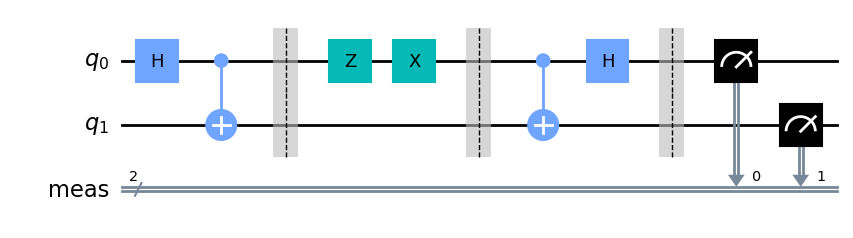

In [15]:
circuit = QuantumCircuit(2)
## create bell states -- standard way to create bell states (ueful to remember)
circuit.h(0)
circuit.cnot(0, 1)
# barrier ensures that all operations are complated befor the circuit proceeds
circuit.barrier()

# 4 case procedure of super dense coding (encoding step)
message = "11" # classical bits to be trasmitted 

if message == "00":
    circuit.id(0)
    
if message == "01":
    circuit.z(0)
    
if message == "10":
    circuit.x(0)
    
if message == "11":
    circuit.z(0)
    circuit.x(0)

circuit.barrier()
# revering the bell state operation (decodig step)
circuit.cnot(0, 1)
circuit.h(0)
circuit.measure_all()

# these last 3 operations correspond to a bell state measurement,
# i. e. measureing which of the 4 bell states trasmitted qubit was in


circuit.draw(output="mpl")

In [16]:
counts = execute(circuit, backend=sim_count).result().get_counts()

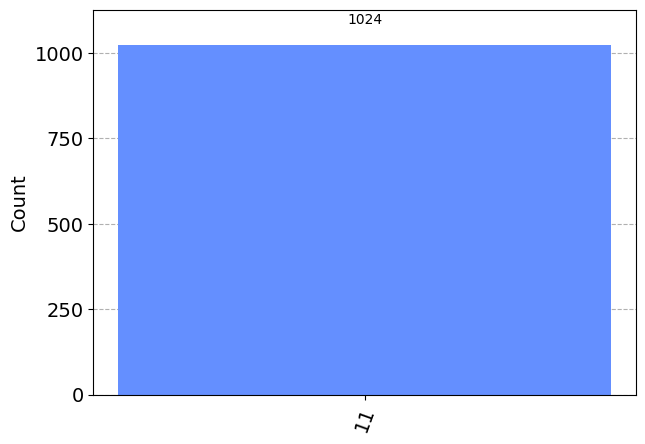

In [13]:
plot_histogram(counts) # deterministic commucation by swaping one qubit 
# 2 bits of information can be encoded deterministically.
# (I think this is experimentally relaised already)